# ***Домашняя работа №10***

---


>**Подключаем библиотеки:**

In [13]:
# Работа с данными
import pandas as pd
import numpy as np

# Библиотеки для визуализации
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:

from google.colab import files


uploaded = files.upload()

Saving spotify-2023_fixed.csv to spotify-2023_fixed.csv


 >**Загружаем данные из файла:**

In [17]:
df = pd.read_csv("spotify-2023_fixed.csv")

>***Выводим таблицу:***

In [ ]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


#**Создадим график тональности по месяцу и году:**

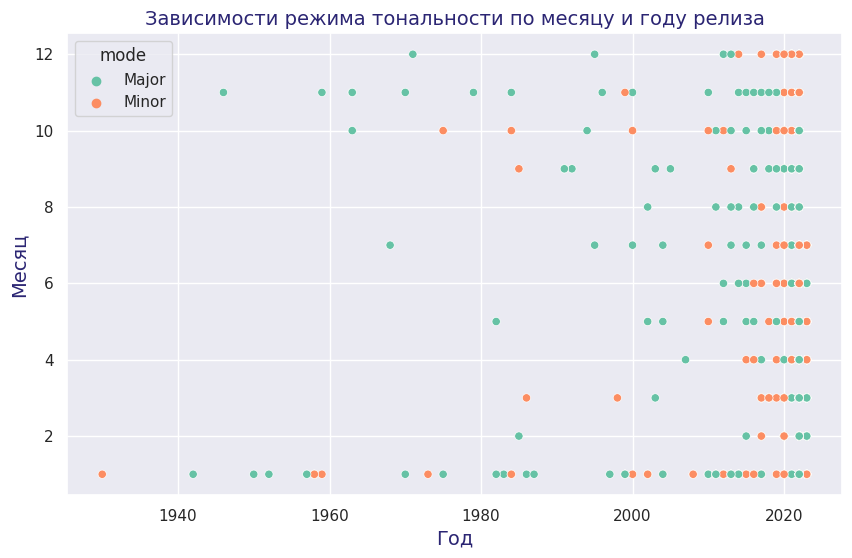

In [ ]:
# График зависимости тональностей
#(мажорной или минорной) произведения по году и месяцу релиза
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize': (10, 6)})
title_dict={'fontsize': 14, 'fontweight': 'normal', 'color': '#2b2573'}
lable_dict={'fontsize': 14, 'color': '#2b2573'}
plt.title("Зависимости режима тональности по месяцу и году релиза",
          fontdict=title_dict)
sns.scatterplot(data=df,
                x='released_year',
                y='released_month',
                hue='mode',
                palette="Set2")
plt.xlabel("Год", fontdict=lable_dict)
plt.ylabel("Месяц", fontdict=lable_dict)
plt.show()

***Вывод:***
*Опираясь на график, представленный выше, можно сделать вывод, что с 1930х по 2000е года преобладали треки с мажорной тональностью. Основная их часть выходила в конце и начале года. При этом самый первый трек был именно в минорной тональности. После 2000х ситуация выранилась.*

# **Создадим график, где сравним рейтинг чартов Spotify и Apple:**

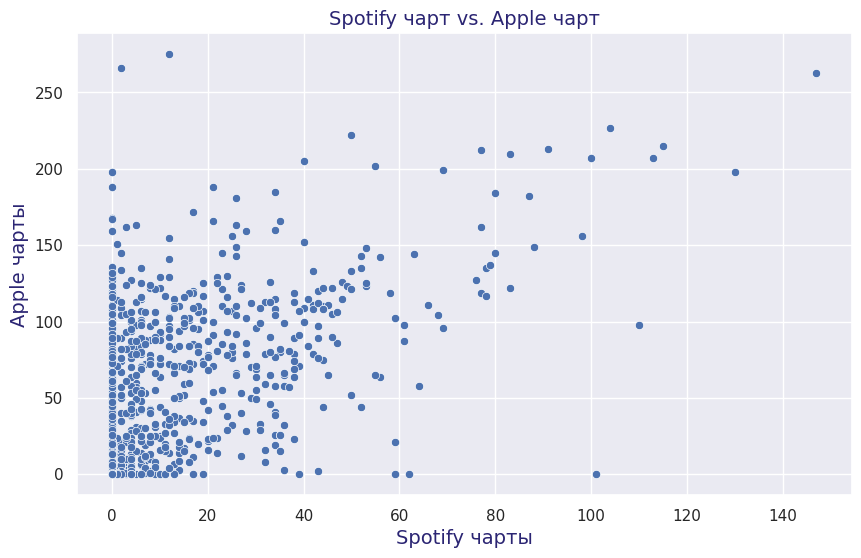

In [ ]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize': (10, 6)})
sns.scatterplot(data=df,
                x='in_spotify_charts',
                y='in_apple_charts',)
plt.title("Spotify чарт vs. Apple чарт", fontdict=title_dict)
plt.xlabel("Spotify чарты", fontdict=lable_dict)
plt.ylabel("Apple чарты", fontdict=lable_dict)
plt.show()

***Вывод:***
*Из предложеного графика выше, можно сделать вывод,что рейтинг треков в Apple выше чем в Spotify. Но при этом количество пользоватей говорит об обратном. В Spotify количесто пользователей значительно больше. Соответсвенно данная площадка ориетируется на иную модель привлечения, чем аналогичный сервис*

#**Создадим график зависимости энергичности трека от года его реализации:**

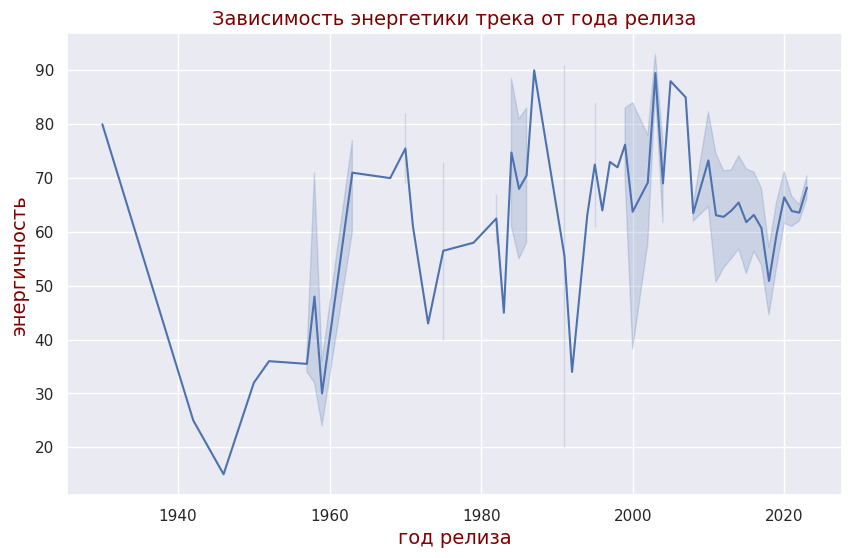

In [27]:

sns.set(rc={'figure.figsize': (10, 6)})
title_dict={'fontsize': 14, 'fontweight': 'normal', 'color': '#800000'}
lable_dict={'fontsize': 14, 'color': '#800000'}
plt.title("Зависимость энергетики трека от года релиза",
          fontdict=title_dict)
plt.xlabel("год релиза", fontdict=lable_dict)
plt.ylabel("энергичность", fontdict=lable_dict)
sns.lineplot(data=df,
             x="released_year",
             y="energy_%")
plt.show()

***Вывод:***
*Из предложеного выше графика , можно сделать вывод, что начиная с 30х годов по конец 40х происходило резкое падение энергичности треков. Здесь можно провести паралель со II Мировой войной. После окончания боевых действий люди возвращались к нормальной жизни и энергичность треков стала расти. В целом показатель энергичности развивался скачками и падениями от года в год. Максимальный показатель пришелся на начало 2000х, когла активно развивалась танцевальная, электронная музыка*

Посчитаем уникальность по столбцам таблицы:

In [28]:
df.nunique()

track_name              943
artist(s)_name          645
artist_count              8
released_year            50
released_month           12
released_day             31
in_spotify_playlists    879
in_spotify_charts        82
streams                 949
in_apple_playlists      234
in_apple_charts         172
in_deezer_playlists     348
in_deezer_charts         34
in_shazam_charts        198
bpm                     124
key                      11
mode                      2
danceability_%           72
valence_%                94
energy_%                 80
acousticness_%           98
instrumentalness_%       39
liveness_%               68
speechiness_%            48
dtype: int64

#**Создадим график зависимости параметров позитивности от количества человек:**

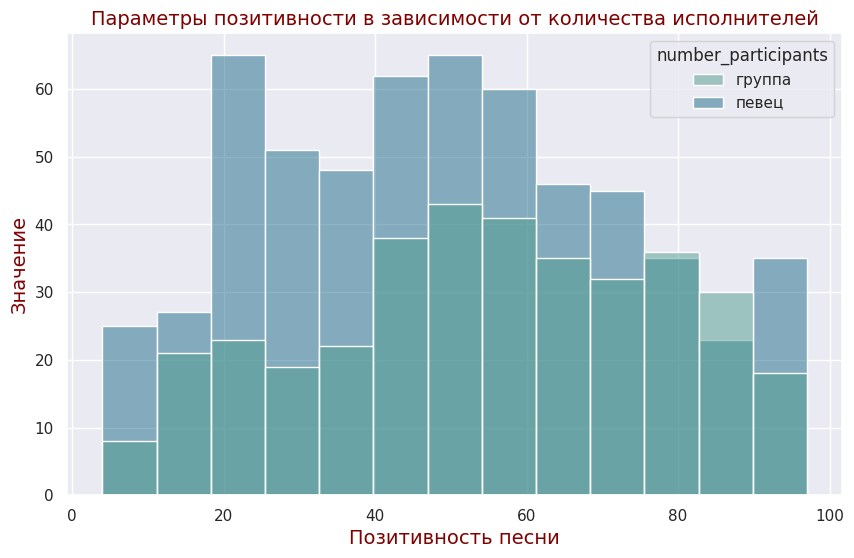

In [46]:
# Разделим исполнителей  на 2 категории: певец и группа
df.loc[df['artist_count'] == 1, 'number_participants'] = 'певец'
df.loc[df['artist_count'] > 1, 'number_participants'] = 'группа'

sns.histplot(data=df, x="valence_%", hue="number_participants", palette="crest")
title_dict={'fontsize': 14, 'fontweight': 'normal', 'color': '#800000'}
lable_dict={'fontsize': 14, 'color': '#800000'}
plt.title("Параметры позитивности в зависимости от количества исполнителей",
          fontdict=title_dict)
plt.xlabel("Позитивность песни", fontdict=lable_dict)
plt.ylabel("Значение", fontdict=lable_dict)

plt.show()

***Вывод:***
*Здесь можно сделать вывод, что как правило у одного исполнителя показатель позитивности песен выше чем у групп*